# Creating dataset - Using Geo Location

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
lexical_fields = {
    'inflation with economic terms': ['inflation', 'hyperinflation', 'deflation', 'stagflation', 'price index',
                                      'monetary policy', 'purchasing power','deflationary', 'anti-inflationary', 'anti-deflationary'],

    'expensive': ['Expensive', 'expensive', 'prohibitive', 'costly', 'high', 'exorbitant', 'unaffordable', 'consequential',
                  'inaccessible', 'excessive', 'abnormal', 'expensive', 'rip-off', 'rip-off', 'ruinous', 'outrageous', 'out of reach',
                  'roundabout', 'inconceivable', 'prohibitive'],

    'cheap': ['Low', 'modest', 'advantageous','discounted', 'unbeatable', 'derisory','attractive', 'bargain', 'bargain price',
              'attractive', 'bargain', 'affordable','reasonable', 'competitive','accessible', 'acceptable', 'normal',
              'fair', 'interesting', 'suitable','negligible'],

    'prices_costs': ['price', 'cost', 'expense', 'fee', 'charge', 'rate', 'tariff','sale', 'purchase', 'lease', 'fee',
                     'subscription', 'bill', 'cost', 'charge', 'pay', 'rate', 'sell', 'quote', 'payment','discount'],

    'statistical_institutions': ['Bureau of Labor Statistics', 'Consumer Price Index', 'Federal Reserve',
                                  'ECB', 'central bank', 'Banque de France', 'INSEE', 'FED', 'rate', 'interest rate', 'Central Bank of Ireland',
                                 'Bank of England', 'Bank', 'Investment Institution'],

    'additional_keywords': ['economy', 'market', 'value', 'money', 'finance',]
}

In [3]:
import os
import json
import gzip  # Import gzip for handling .gz (gzipped) files

# json_dir is the directory that contains a day's worth of files
json_dir = '/content/gdrive/MyDrive/November 21st 2022'

outfolder = 'output'
if not os.path.exists(outfolder):
    os.makedirs(outfolder)

json_list = []  # list of lists, each sublist has 1 string element = 1 line

for path, dirs, files in os.walk(json_dir):
    for f in files:
        if f.endswith('.json') or f.endswith('.gz'):  # Check for .json and .gz files
            json_file = os.path.join(path, f)
            if f.endswith('.gz'):  # If the file is a .gz file, decompress it first
                with gzip.open(json_file, 'rt', encoding='utf-8') as jf:  # Open and read the .gz file
                    jfile_list = list(jf)
                    json_list.extend(jfile_list)
            else:
                with open(json_file, 'r', encoding='utf-8') as jf:
                    jfile_list = list(jf)
                    json_list.extend(jfile_list)

print("Finished reading", len(json_list), 'records into list')
print('Converting geocoded JSONL records to dictionary now...')

geo_dict = {}  # dictionary of dicts, each dict has line parsed into keys / values
i = 0
for json_str in json_list:
    result = json.loads(json_str)  # convert line / string to dict
    if result.get('geo') is not None:  # only take records that were geocoded
        geo_dict[result['id']] = result
    i += 1
    if i % 100000 == 0:
        print('Processed', i, 'records...')

print('Finished processing', i, 'records.')
print('Created dictionary with', len(geo_dict), 'geocoded records...')

# Define the output file name
outfile = 'all_records_with_geo_v21.json'

# Correctly construct the output path by joining the output folder and the output file name
outpath = os.path.join(outfolder, outfile)

print('Writing output for all geo records...')
with open(outpath, 'w', encoding='utf-8') as outf:
    json.dump(geo_dict, outf)

print('Wrote output file - Done!')

Finished reading 4190001 records into list
Converting geocoded JSONL records to dictionary now...
Processed 100000 records...
Processed 200000 records...
Processed 300000 records...
Processed 400000 records...
Processed 500000 records...
Processed 600000 records...
Processed 700000 records...
Processed 800000 records...
Processed 900000 records...
Processed 1000000 records...
Processed 1100000 records...
Processed 1200000 records...
Processed 1300000 records...
Processed 1400000 records...
Processed 1500000 records...
Processed 1600000 records...
Processed 1700000 records...
Processed 1800000 records...
Processed 1900000 records...
Processed 2000000 records...
Processed 2100000 records...
Processed 2200000 records...
Processed 2300000 records...
Processed 2400000 records...
Processed 2500000 records...
Processed 2600000 records...
Processed 2700000 records...
Processed 2800000 records...
Processed 2900000 records...
Processed 3000000 records...
Processed 3100000 records...
Processed 32

In [4]:
import json, csv, os

# The input file is already correctly specified with its full path.
infile = '/content/output/all_records_with_geo_v21.json'

# Load the JSON data directly from the infile
with open(infile, 'r', encoding='utf-8') as json_file:
    twit_data = json.load(json_file)

twit_list = []

# Process the JSON data to extract the needed information.
for k, v in twit_data.items():
    tweet_id = k
    timestamp = v.get('created_at')
    tweet = v.get('text')
    lang = v.get('lang')
    longitude = v.get('geo')['coordinates'][1] if v.get('geo') else None
    latitude = v.get('geo')['coordinates'][0] if v.get('geo') else None
    country = v.get('place')['country'] if v.get('place') else None
    ccode = v.get('place')['country_code'] if v.get('place') else None

    record = [tweet_id, timestamp, tweet, lang, longitude, latitude, country, ccode]
    twit_list.append(record)


outfile = 'november_21st.csv'

# Ensure the output directory exists before writing the file.
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

outpath = os.path.join(output_dir, outfile)

# Write the output CSV file.
with open(outpath, 'w', newline='', encoding='utf-8') as writefile:
    writer = csv.writer(writefile, quoting=csv.QUOTE_ALL, delimiter=',')
    header = ['tweet_id', 'timestamp', 'tweet', 'lang', 'longitude', 'latitude', 'country','ccode']
    writer.writerow(header)
    writer.writerows(twit_list)

print('Done!')

Done!


# Creating dataset

In [ ]:
import pandas as pd

# Columns to keep
columns_to_keep = ['tweet_id', 'timestamp', 'tweet', 'lang', 'longitude', 'latitude', 'country', 'ccode']

# Load the datasets
df1 = pd.read_csv('/content/EDA/November 1st 2022.csv', usecols=lambda x: x in columns_to_keep)
df2 = pd.read_csv('/content/EDA/November 2nd 2022.csv', usecols=lambda x: x in columns_to_keep)
df3 = pd.read_csv('/content/EDA/November 3rd 2022.csv', usecols=lambda x: x in columns_to_keep)
df4 = pd.read_csv('/content/EDA/November 4th 2022.csv', usecols=lambda x: x in columns_to_keep)
df5 = pd.read_csv('/content/EDA/November 5th 2022.csv', usecols=lambda x: x in columns_to_keep)
df6 = pd.read_csv('/content/EDA/November 6th 2022.csv', usecols=lambda x: x in columns_to_keep)
df7 = pd.read_csv('/content/EDA/November 7th 2022.csv', usecols=lambda x: x in columns_to_keep)
df8 = pd.read_csv('/content/EDA/november_8th.csv', usecols=lambda x: x in columns_to_keep)
df9 = pd.read_csv('/content/EDA/november_9th.csv', usecols=lambda x: x in columns_to_keep)
df10 = pd.read_csv('/content/EDA/november_10th.csv', usecols=lambda x: x in columns_to_keep)
df11 = pd.read_csv('/content/EDA/november_11th.csv', usecols=lambda x: x in columns_to_keep)
df12 = pd.read_csv('/content/EDA/november_12th.csv', usecols=lambda x: x in columns_to_keep)
df13 = pd.read_csv('/content/EDA/november_13th.csv', usecols=lambda x: x in columns_to_keep)
df14 = pd.read_csv('/content/EDA/november_14th.csv', usecols=lambda x: x in columns_to_keep)
df15 = pd.read_csv('/content/EDA/november_15th.csv', usecols=lambda x: x in columns_to_keep)
df16 = pd.read_csv('/content/EDA/november_16th.csv', usecols=lambda x: x in columns_to_keep)
df17 = pd.read_csv('/content/EDA/november_17th.csv', usecols=lambda x: x in columns_to_keep)
df18 = pd.read_csv('/content/EDA/november_18th.csv', usecols=lambda x: x in columns_to_keep)
df19 = pd.read_csv('/content/EDA/november_19th.csv', usecols=lambda x: x in columns_to_keep)
df20 = pd.read_csv('/content/EDA/november_20th.csv', usecols=lambda x: x in columns_to_keep)
df21 = pd.read_csv('/content/EDA/november_21st.csv', usecols=lambda x: x in columns_to_keep)

In [ ]:
# Merge the dataframes
merged_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21 ])

In [ ]:
# Save the merged dataframe to a new CSV file
merged_df.to_csv('/content/EDA_Combined.csv', index=False)

# Output the path to the merged file
merged_file_path = '/content/Combined EDA .csv'
merged_file_path

'/content/Combined EDA .csv'

# Preprocessing

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/EDA_Combined.csv'
df = pd.read_csv(file_path)

# Check the first few rows of the dataframe to understand its structure
df.head()

,tweet_id,timestamp,tweet,lang,longitude,latitude,country,ccode
0,1587232989255196672,Tue Nov 01 00:00:08 +0000 2022,Drinking a Black Wych by @hobgoblinbeer @ Cybe...,en,-3.0906005,53.3452759,United Kingdom,GB
1,1587233022834872322,Tue Nov 01 00:00:16 +0000 2022,"23:48 Temp. 12.9°C, Hum. 92%, Dewp. 11.3°C, Ba...",en,-5.6650741,54.4110584,United Kingdom,GB
2,1587233027007995906,Tue Nov 01 00:00:17 +0000 2022,🗺️ Capitan Basilio Araujo 4098 #Cerrito\n📆 201...,es,-56.16828949,-34.85340636,Uruguay,UY
3,1587233240909234176,Tue Nov 01 00:01:08 +0000 2022,I'm at 疋田町交差点 https://t.co/pdYQNu2OB4,ja,136.67002869,36.60461044,日本,JP
4,1587233287050772480,Tue Nov 01 00:01:19 +0000 2022,演歌推しの皆様、ぜひご来場くださいね。そしてCDご購入いただき、みゆちゃんのおうえんをよろし...,ja,140.883,37.05,日本,JP


In [ ]:
# Function to check if a tweet contains any of the keywords
def contains_keywords(tweet, keywords):
    # Ensure the tweet is a string
    tweet = str(tweet)
    return any(keyword.lower() in tweet.lower() for keyword in keywords)

# Count the tweets containing each category of keywords
keyword_counts = {category: sum(df['tweet'].apply(lambda tweet: contains_keywords(tweet, keywords))) for category, keywords in lexical_fields.items()}

keyword_counts

{'inflation with economic terms': 0,
 'expensive': 137,
 'cheap': 507,
 'prices_costs': 765,
 'statistical_institutions': 198,
 'additional_keywords': 144}

In [ ]:
print(df.shape)

(23632, 8)


In [ ]:
print(df.isna().sum())

tweet_id       0
timestamp      0
tweet          0
lang           1
longitude      1
latitude       1
country      175
ccode        179
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
# Function to check if a tweet contains any of the keywords from the lexical fields
def filter_tweets(tweet, fields):
    if isinstance(tweet, str):
        return any(any(keyword in tweet.lower() for keyword in field) for field in fields.values())
    else:
        # If tweet is not a string, we do not consider it for our lexical fields
        return False

In [ ]:
import re
# Apply the adjusted filter function to the DataFrame
filtered_df = df[df['tweet'].apply(lambda tweet: filter_tweets(tweet, lexical_fields))]

# Function to identify invalid characters
def contains_invalid_characters(text):
    # Define a set of allowed punctuation characters
    allowed_punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    pattern = r'^[A-Za-z0-9\s' + re.escape(allowed_punctuation) + r']+$'
    return not re.match(pattern, text)

# Apply the function to the 'clean_text' column to create a mask for rows with invalid characters
invalid_mask = filtered_df['tweet'].apply(lambda x: contains_invalid_characters(str(x)))

In [ ]:
# Invert the mask to filter out the invalid rows
df = filtered_df[~invalid_mask]

# Now 'clean_df' contains only rows with valid characters & english language
print(f"Number of rows after removing invalid characters: {len(df)}")

Number of rows after removing invalid characters: 413


In [ ]:
unique_country = df['ccode'].unique()

print("Unique country in the 'ccode' column:")
for country in unique_country:
    print(country)

Unique country in the 'ccode' column:
CO
AE
GB
US
GH
ES
AU
KE
NG
NZ
IN
AR
HK
IT
DE
VN
TZ
EG
BR
SA
CA
MY
MX
TR
JP
TH
KW
FM
BH
NL
SG
PH
ET
HR
ID
PK
RW
CR
IE
TJ
ZA


In [ ]:
# Count of all countries in the 'ccode' column
country_counts = df['ccode'].value_counts()

country_counts

US    253
IN     21
GB     19
NZ     11
AE     10
BR      9
CA      8
NG      7
DE      6
KE      5
PH      5
MY      5
AU      4
ET      4
SA      4
ES      4
PK      4
ID      3
TH      3
NL      2
RW      2
MX      2
JP      2
IE      2
SG      2
HR      1
TJ      1
CR      1
CO      1
BH      1
FM      1
KW      1
TR      1
EG      1
TZ      1
VN      1
IT      1
HK      1
AR      1
GH      1
ZA      1
Name: ccode, dtype: int64

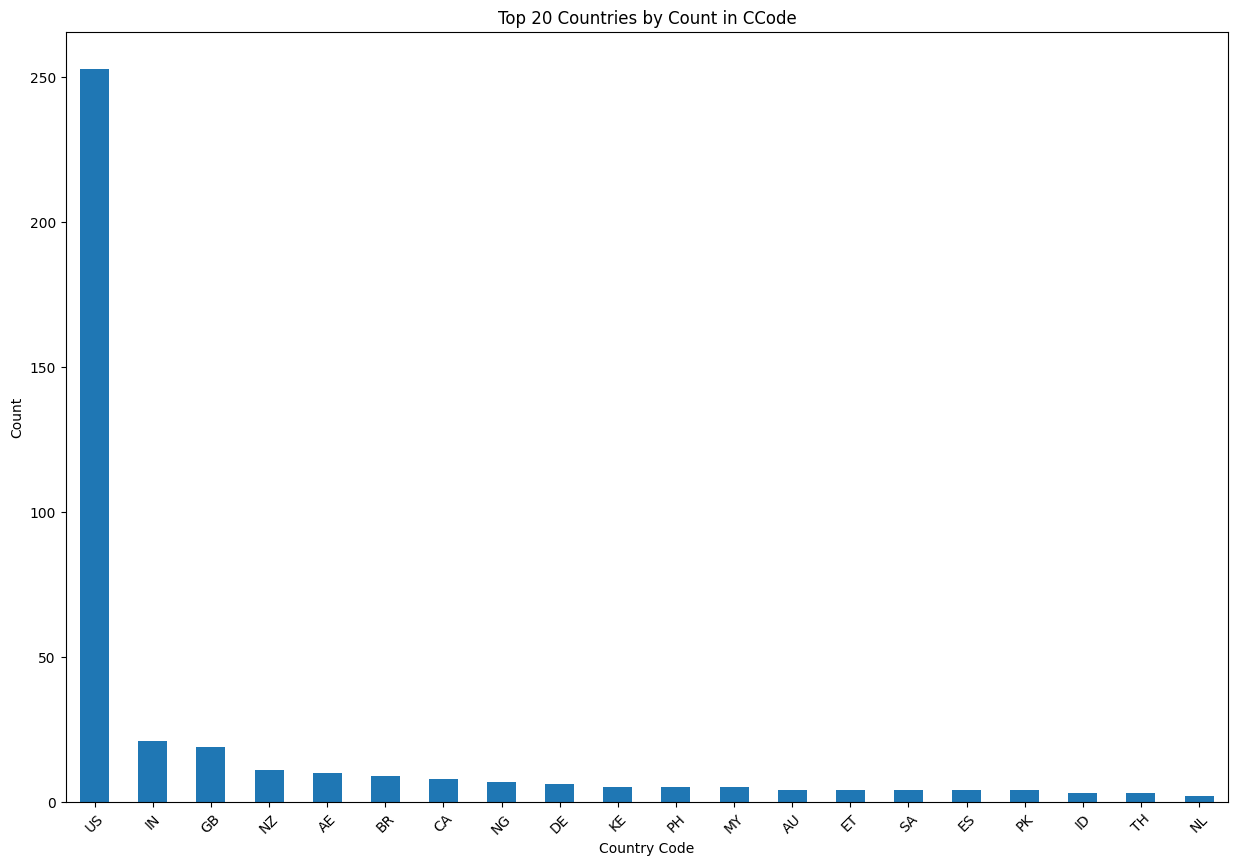

In [ ]:
import matplotlib.pyplot as plt

# Plotting the count of countries in 'ccode'
plt.figure(figsize=(15, 10))
country_counts[:20].plot(kind='bar')  # Only plotting the top 20 for readability
plt.title('Top 20 Countries by Count in CCode')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Add sentiment column - Unsupervised

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Convert all tweet texts to strings and handle missing values
df['tweet'] = df['tweet'].astype(str).fillna('')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get numerical sentiment
def get_numerical_sentiment(text):
    score = sia.polarity_scores(text)
    # Return a numerical sentiment based on the compound score
    if score['compound'] >= 0.05:
        return 1  # Positive
    elif score['compound'] <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

# Apply the numerical sentiment function to each tweet
df['sentiment'] = df['tweet'].apply(get_numerical_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-17-f0cb328a8448>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'] = df['tweet'].astype(str).fillna('')
<ipython-input-17-f0cb328a8448>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['tweet'].apply(get_numerical_sentiment)


In [ ]:
# Save the modified DataFrame to a new CSV file
new_csv_path = '/content/EDA_Combined_Sent_Inf.csv'
df.to_csv(new_csv_path, index=False)

print(f"New CSV file saved to: {new_csv_path}")

New CSV file saved to: /content/EDA_Combined_Sent_Inf.csv


# EDA

In [ ]:
import pandas as pd
df_sent = pd.read_csv("/content/EDA_Combined_Sent_Inf.csv")

In [ ]:
df_sent.head()

,tweet_id,timestamp,tweet,lang,longitude,latitude,country,ccode,sentiment
0,1587259887335211009,Tue Nov 01 01:47:01 +0000 2022,Acaba de publicar una foto en Juan de Acosta h...,es,-75.034040,10.829630,Colombia,CO,0
1,1587302207858348034,Tue Nov 01 04:35:11 +0000 2022,Offer 20% discount. WhatsApp. +971551755396 co...,en,54.000000,23.783333,United Arab Emirates,AE,1
2,1587348286494720000,Tue Nov 01 07:38:17 +0000 2022,Pre-Match Coffee Ritual @ Harrietsham https://...,en,0.683333,51.233300,United Kingdom,GB,0
3,1587351239267860480,Tue Nov 01 07:50:01 +0000 2022,58.8F (Feels: 61.0F) - Humidity: 99% - Wind: 0...,en,-92.218675,29.875016,United States,US,-1
4,1587351738419404800,Tue Nov 01 07:52:00 +0000 2022,Size: 40\n\nPrice: 35ghc \n\n059 709 6540 \n\n...,en,0.001400,5.663300,Ghana,GH,0


In [ ]:
print(df_sent.columns)

Index(['tweet_id', 'timestamp', 'tweet', 'lang', 'longitude', 'latitude',
       'country', 'ccode', 'sentiment'],
      dtype='object')


In [ ]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', df_sent.sentiment.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', df_sent.sentiment.value_counts() / len(df))

Number of positive and negative reviews:   0    220
 1    132
-1     61
Name: sentiment, dtype: int64
Proportion of positive and negative reviews:   0    0.532688
 1    0.319613
-1    0.147700
Name: sentiment, dtype: float64


## Sentiment Distribution

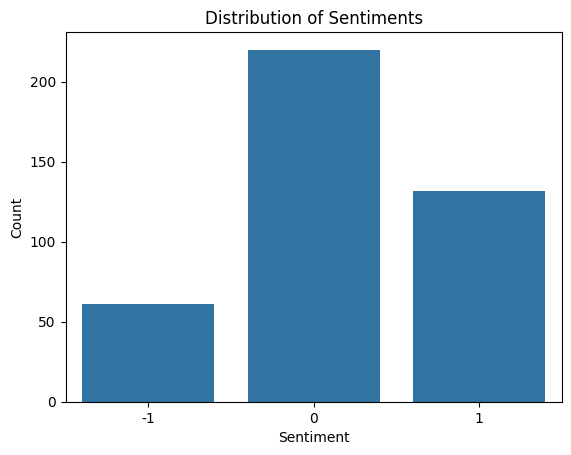

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data= df_sent)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Tweet Language Distribution

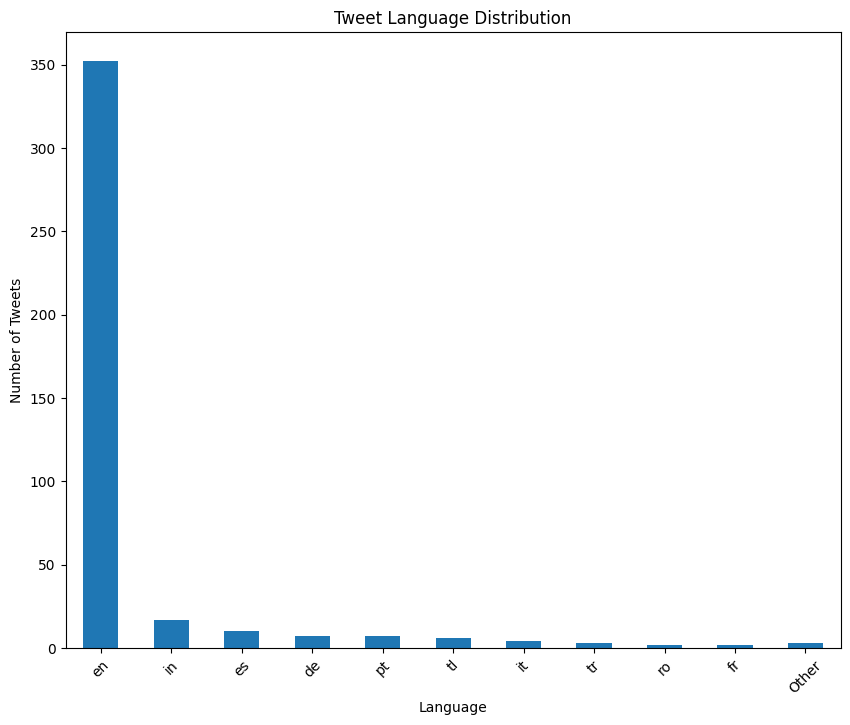

In [ ]:
# Tweet Language Distribution
top_n = 10
languages_count = df_sent['lang'].value_counts()
top_languages = languages_count[:top_n]
top_languages['Other'] = languages_count[top_n:].sum()

plt.figure(figsize=(10, 8))
top_languages.plot(kind='bar')
plt.title('Tweet Language Distribution')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

## Tweets Over Time

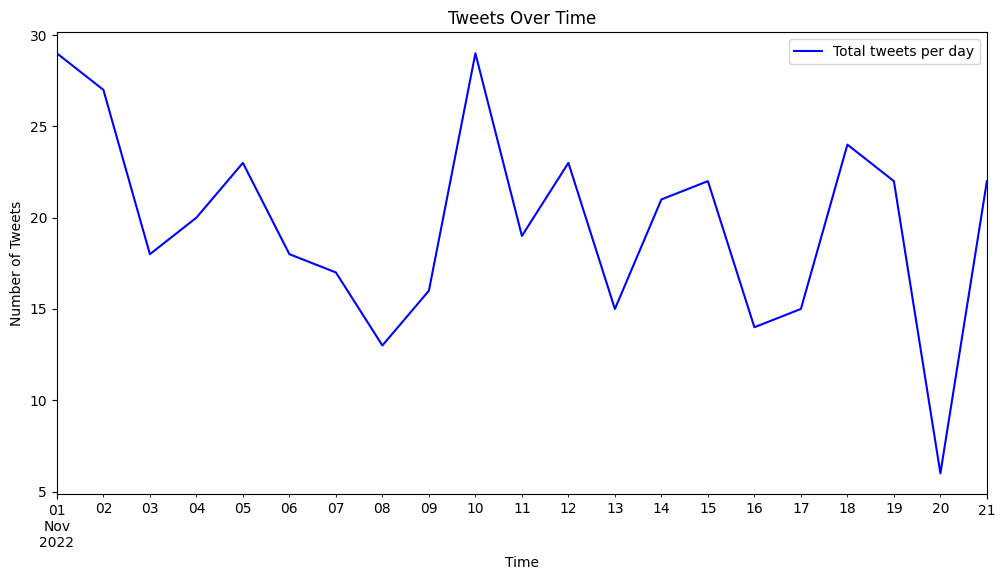

In [ ]:
df_sent['timestamp'] = pd.to_datetime(df_sent['timestamp'])
df_sent.set_index('timestamp', inplace=True)

plt.figure(figsize=(12, 6))
df_sent.resample('D').size().plot(label='Total tweets per day', color='blue')
plt.title('Tweets Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

## Sentiment Over Time

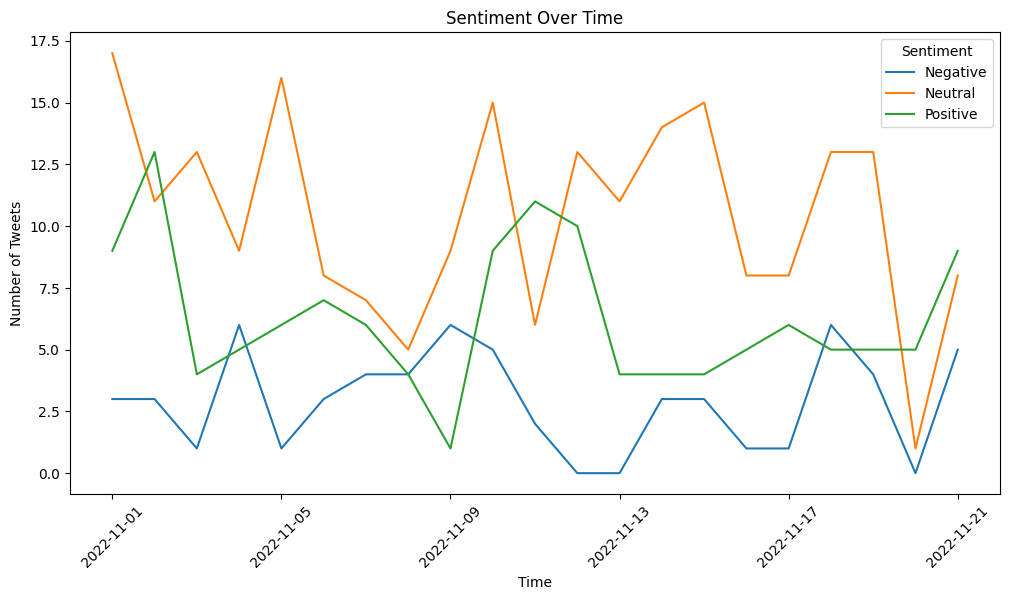

In [ ]:
# Group by the index
sentiment_over_time = df_sent.groupby([df_sent.index.date, 'sentiment']).size().unstack(fill_value=0)

# Plotting
sentiment_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Sentiment Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.legend(['Negative', 'Neutral', 'Positive'], title='Sentiment')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

### Sentiment in US over time

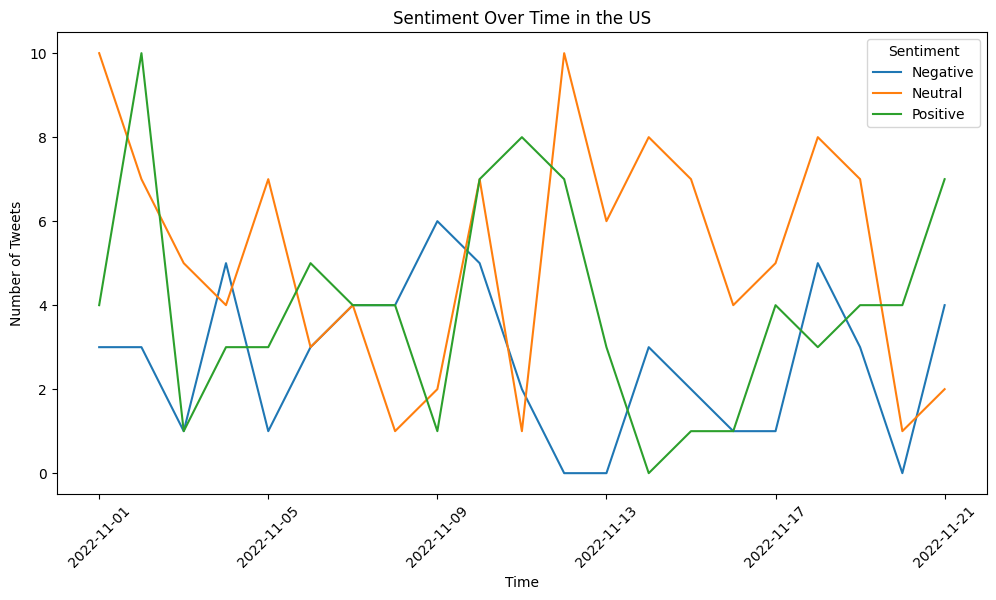

In [ ]:
# Filter the dataset for US only, considering the original datetime index is maintained
df_us_corrected = df_sent[df_sent['country'] == "United States"]

# Group by the index for US dataset
sentiment_over_time_us_corrected = df_us_corrected.groupby([df_us_corrected.index.date, 'sentiment']).size().unstack(fill_value=0)

# Plotting for US data with corrected approach
sentiment_over_time_us_corrected.plot(kind='line', figsize=(12, 6))
plt.title('Sentiment Over Time in the US')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.legend(['Negative', 'Neutral', 'Positive'], title='Sentiment')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

## Geographical Distribution of Tweets with a World map

In [ ]:
!pip install geopandas

<ipython-input-30-481aaa52da03>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


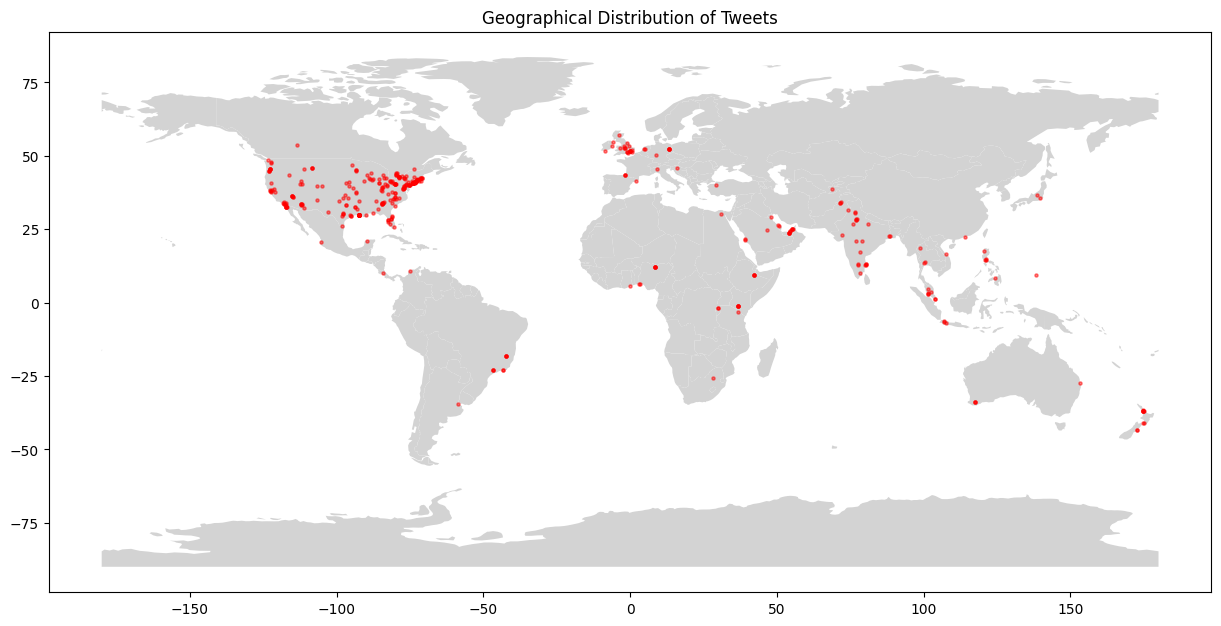

In [ ]:
import geopandas as gpd

# Load a simple world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame from tweet data
gdf = gpd.GeoDataFrame(df_sent, geometry=gpd.points_from_xy(df_sent.longitude, df_sent.latitude))

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.5)
plt.title('Geographical Distribution of Tweets')
plt.show()

## Language vs Sentiment

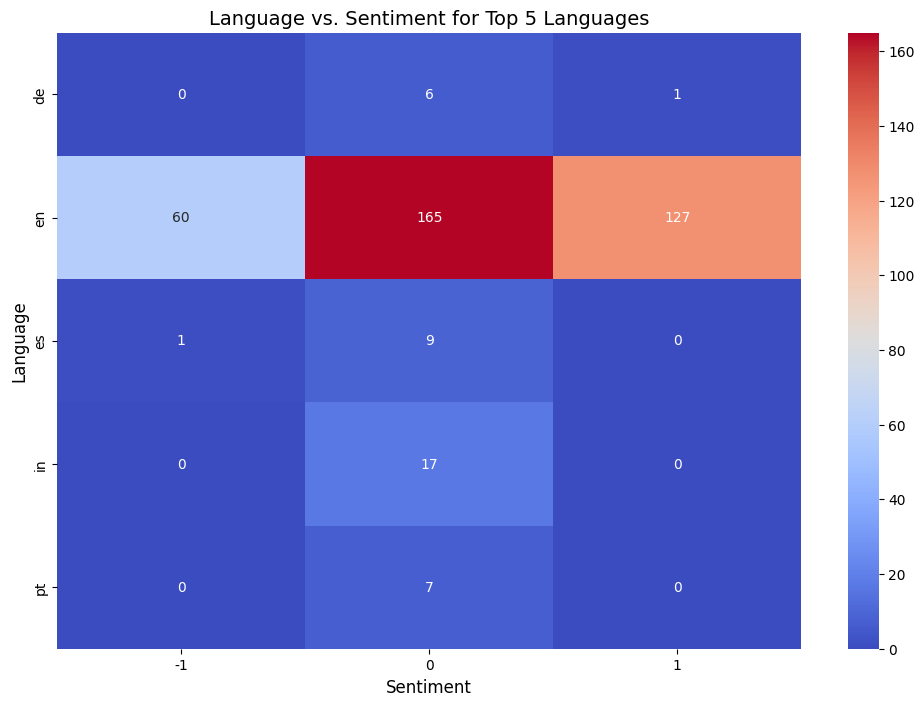

In [ ]:
# Focus on Top Languages by tweet count
top_languages = df_sent['lang'].value_counts().nlargest(5).index

# Filter data for these top languages
filtered_data = df_sent[df_sent['lang'].isin(top_languages)]

# Pivot table for this filtered data
pivot_table_filtered = filtered_data.pivot_table(index='lang', columns='sentiment', aggfunc='size', fill_value=0)


plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table_filtered, annot=True, cmap='coolwarm', fmt='d', annot_kws={"size": 10})
plt.title('Language vs. Sentiment for Top 5 Languages', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Advanced EDA

## How does average sentiment change over time for the top languages?

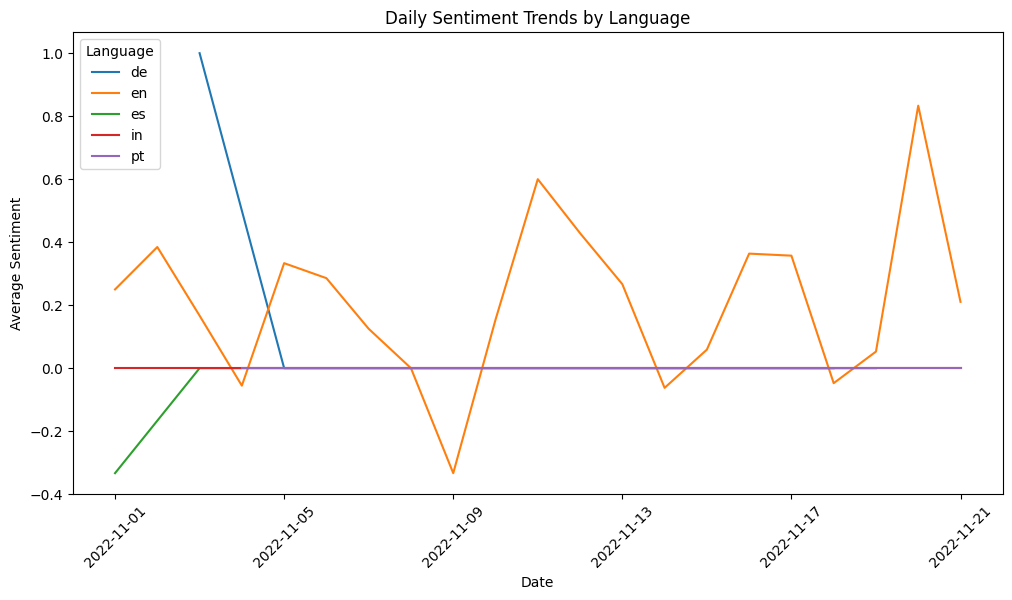

In [ ]:
# Filter for top languages to make the plot more readable
top_languages = df_sent['lang'].value_counts().head(5).index
filtered_data = df_sent[df_sent['lang'].isin(top_languages)]

# Group data by 'timestamp' (index) and 'lang', then calculate the average sentiment
daily_sentiment = filtered_data.groupby([pd.Grouper(freq='D'), 'lang'])['sentiment'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment, dashes=False)
plt.title('Daily Sentiment Trends by Language')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.legend(title='Language')
plt.xticks(rotation=45)
plt.show()

## Geospatial Heat Maps of Sentiment

<ipython-input-36-9433f5cdf9ef>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


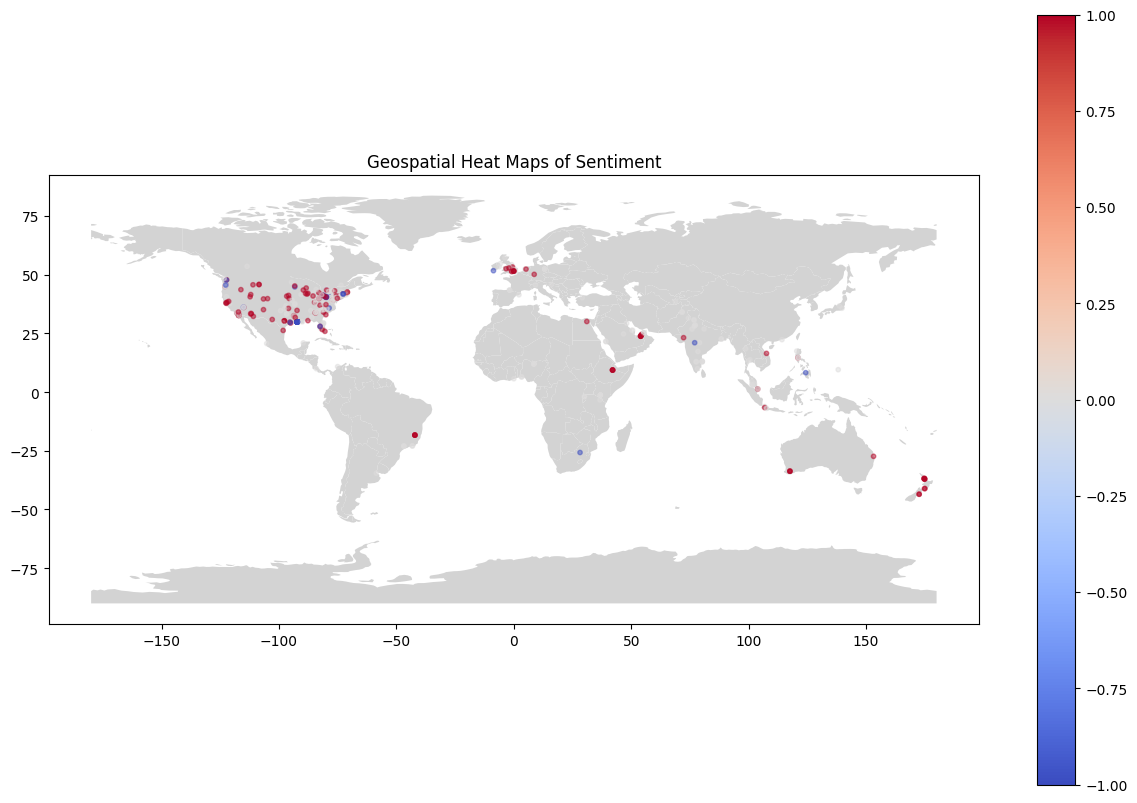

In [ ]:
# Convert your DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df_sent, geometry=gpd.points_from_xy(df_sent.longitude, df_sent.latitude))

# Load a basemap
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# Correcting the plot command to use 'markersize' instead of 's'
# Note: 'markersize' might need to be a fixed value or adjusted based on your dataset's specifics
gdf.plot(ax=ax, marker='o', column='sentiment', cmap='coolwarm', alpha=0.5, legend=True, markersize=10)

plt.title('Geospatial Heat Maps of Sentiment')
plt.show()

## Average sentiment numbers per country

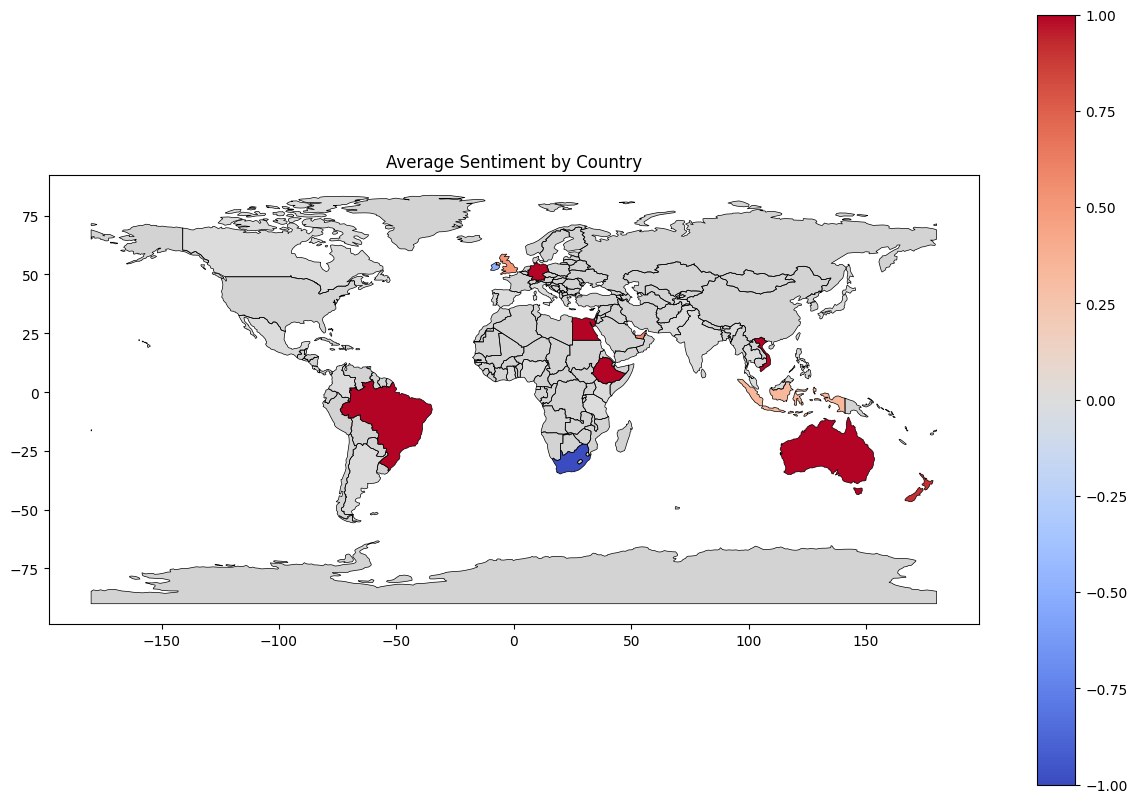

In [ ]:
# Aggregate average sentiment by country
avg_sentiment_per_country = gdf.groupby('country')['sentiment'].mean().reset_index()

# Merge this average sentiment data with the world GeoDataFrame
world_with_sentiment = world.merge(avg_sentiment_per_country, how='left', left_on='name', right_on='country')

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
base = world_with_sentiment.plot(ax=ax, column='sentiment', cmap='coolwarm', missing_kwds={'color': 'lightgrey'}, legend=True)
world.boundary.plot(ax=ax, edgecolor='k', linewidth=0.5)
ax.set_title('Average Sentiment by Country')
plt.show()